In [42]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [33]:
#Loading California Housing Dataset
dataset = fetch_california_housing(as_frame = True)

In [34]:
#close look inside the data & attributes
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [35]:
# Defining x & y

x= dataset['data']
y = dataset['target']

In [36]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [37]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

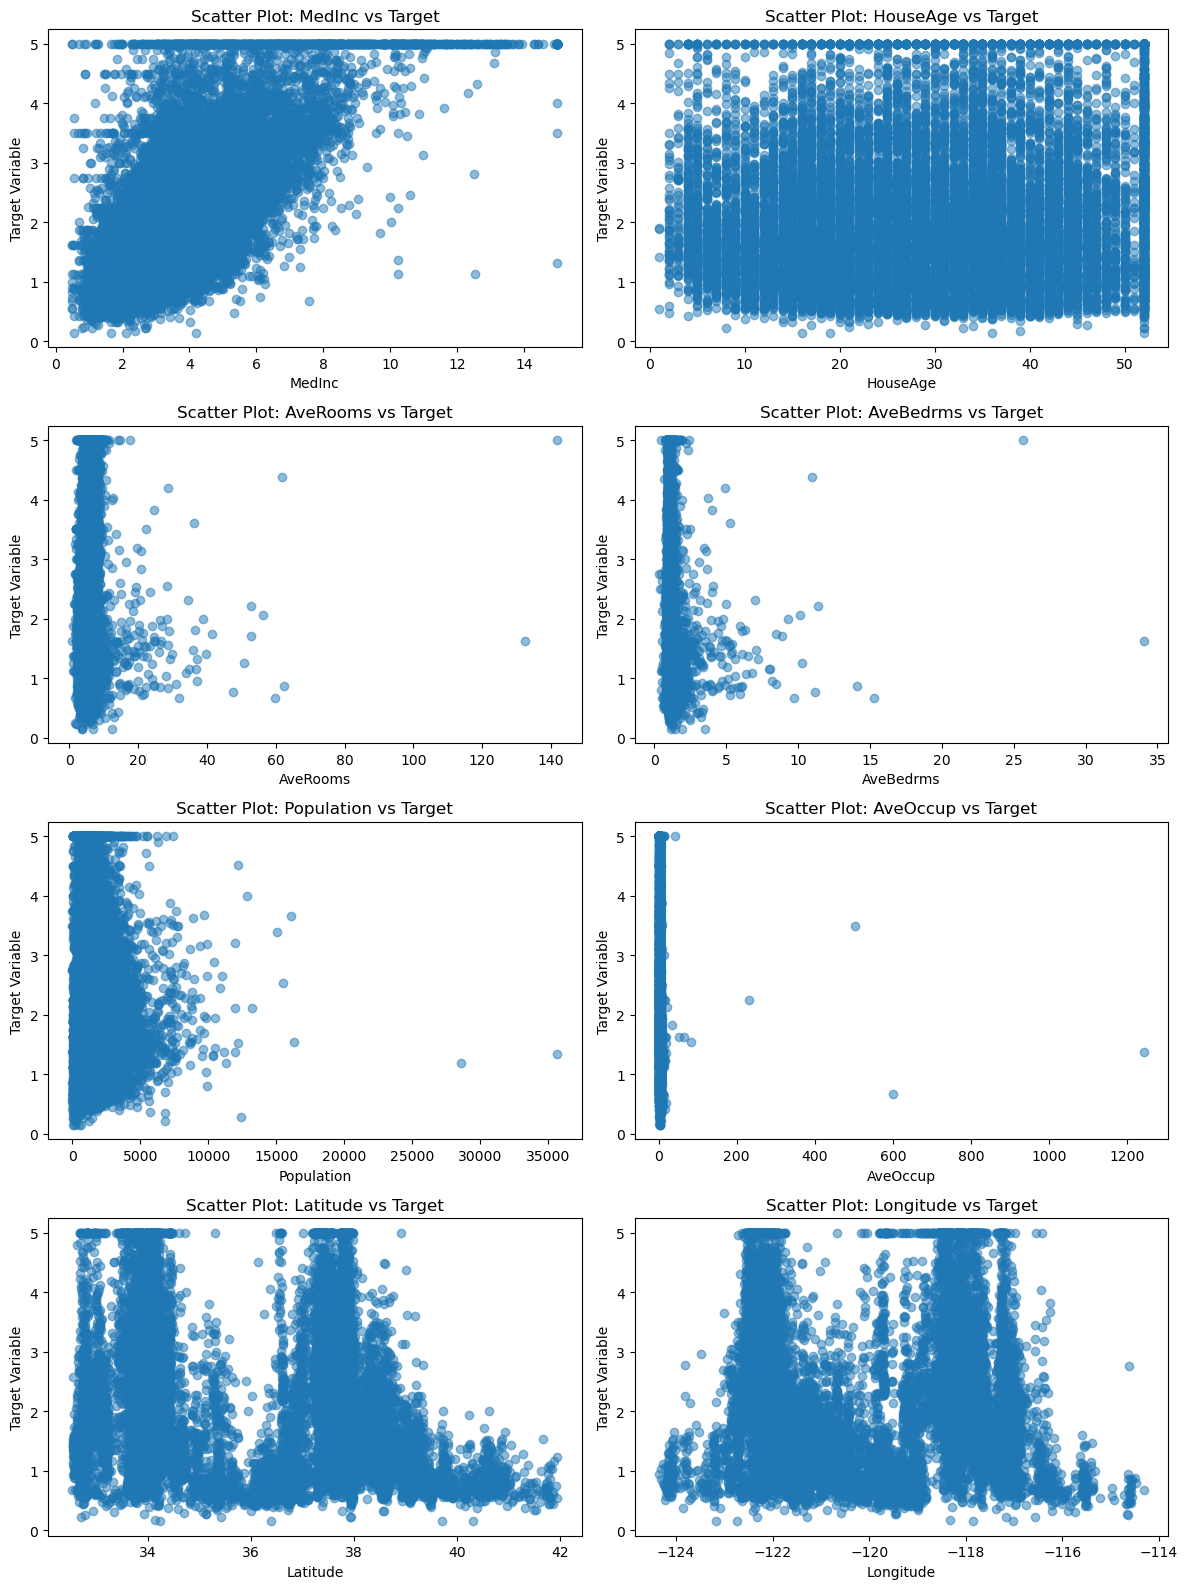

In [38]:
# Get the feature names
feature_names = dataset.feature_names

# Calculate the number of rows needed for the subplot grid
num_features = len(feature_names)
num_rows = (num_features + 1) // 2  # Add 1 to round up if there's an odd number of features

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

# Iterate over each feature and create a scatter plot
for i, feature in enumerate(feature_names):
    ax = axes[i]
    ax.scatter(x[feature], y, alpha=0.5)
    ax.set_title(f'Scatter Plot: {feature} vs Target')
    ax.set_xlabel(feature)
    ax.set_ylabel('Target Variable')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [43]:
#Pre_processing

scaler=StandardScaler()
x=scaler.fit_transform(x)

In [45]:
# after preprocessing datasets

print(x) 

[[ 2.34476576  0.98214266  0.62855945 ... -0.04959654  1.05254828
  -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 ... -0.09251223  1.04318455
  -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 ... -0.02584253  1.03850269
  -1.33282653]
 ...
 [-1.14259331 -0.92485123 -0.09031802 ... -0.0717345   1.77823747
  -0.8237132 ]
 [-1.05458292 -0.84539315 -0.04021111 ... -0.09122515  1.77823747
  -0.87362627]
 [-0.78012947 -1.00430931 -0.07044252 ... -0.04368215  1.75014627
  -0.83369581]]


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [47]:
print(x_train.shape, x_test.shape)

(15480, 8) (5160, 8)


In [48]:
# model Dev & training

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [49]:
#Evaluation Metrics

r2_s = r2_score(y_test, y_pred)
mse_error = mean_squared_error(y_test, y_pred)
print("R2 score is: ",r2_s)
print("Mean Square error is: ",mse_error)

R2 score is:  0.5961800461868956
Mean Square error is:  0.5387839690509564
